Epoch: 0/1000		Training cost = 8.99e+01		Validation cost = 9.21e+01
Epoch: 100/1000		Training cost = 1.10e-01		Validation cost = 5.65e-01
Epoch: 200/1000		Training cost = 3.66e-02		Validation cost = 2.21e-01
Epoch: 300/1000		Training cost = 1.38e-02		Validation cost = 7.67e-02
Epoch: 400/1000		Training cost = 6.19e-03		Validation cost = 3.38e-02
Epoch: 500/1000		Training cost = 3.46e-03		Validation cost = 2.35e-02
Epoch: 600/1000		Training cost = 2.34e-03		Validation cost = 2.31e-02
Epoch: 700/1000		Training cost = 1.78e-03		Validation cost = 2.53e-02
Epoch: 800/1000		Training cost = 1.44e-03		Validation cost = 2.80e-02
Epoch: 900/1000		Training cost = 1.18e-03		Validation cost = 3.06e-02


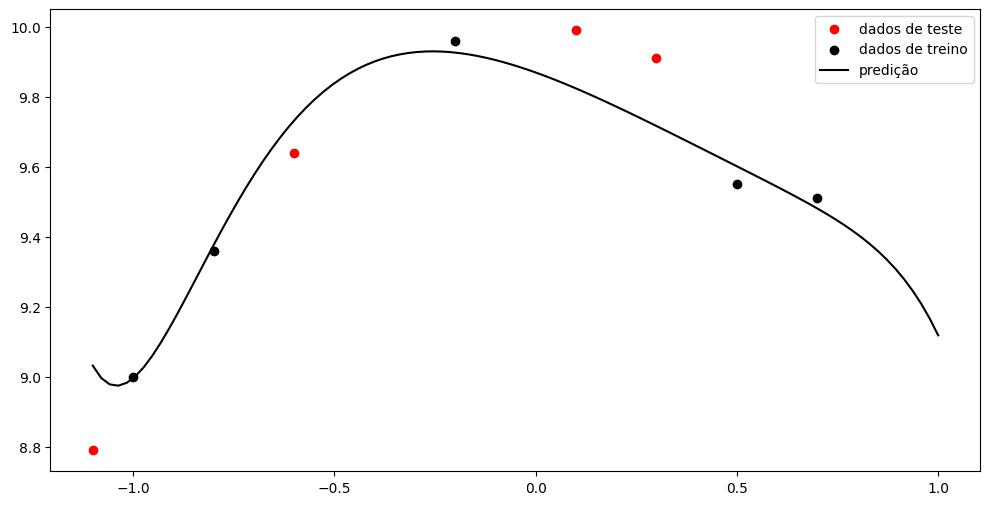

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Geração de dados não-lineares para treino e teste
np.random.seed(10)  # Fixa a semente aleatória para reprodutibilidade
xTrain = np.array([-1.0, -0.8, -0.2, 0.5, 0.7])  # Pontos de treino no eixo x
yTrain = -(xTrain ** 2) + 10.0  # Relação quadrática (parábola invertida)
yTrain[3] -= 0.2  # Adiciona ruído em um ponto específico

xTest = np.array([-1.1, -0.6, 0.1, 0.3])  # Pontos de teste
yTest = -(xTest ** 2) + 10.0  # Mesma relação quadrática

# Definição do modelo de regressão polinomial
class HigherOrderRegression:
    def __init__(self, polynomialDegree, regularization=None):
        self.polynomialDegree = polynomialDegree  # Grau do polinômio
        self.regularization = regularization  # Termo de regularização L2 (opcional)
        self.weights = np.zeros(polynomialDegree)  # Pesos para cada termo polinomial
        self.bias = 0  # Termo de viés (constante)

    def forward(self, x):
        # Calcula a predição do modelo: y = bias + w1*x + w2*x² + ... + wn*x^n
        y = self.bias
        for i in range(self.polynomialDegree):
            y += self.weights[i] * x ** (i + 1)
        return y

    def costFunction(self, x, y):
        # Calcula o erro quadrático médio (MSE)
        cost = np.mean((self.forward(x) - y) ** 2)
        # Adiciona regularização L2 se especificado
        if self.regularization == None:
            return cost
        else:
            return cost + self.regularization * (np.sum(self.weights ** 2) + self.bias ** 2)

    def gradient(self, x, y):
        # Calcula os gradientes para cada peso e viés
        gradientWeights = np.zeros(self.polynomialDegree)
        gradientBias = 2 * (self.forward(x) - y)  # Gradiente do viés

        for i in range(self.polynomialDegree):
            gradientWeights[i] = np.mean(gradientBias * x ** (i + 1))  # Gradiente para cada peso

        gradientBias = np.mean(gradientBias)

        # Adiciona termo de regularização aos gradientes se especificado
        if self.regularization != None:
            for i in range(self.polynomialDegree):
                gradientWeights[i] += 2 * self.regularization * self.weights[i]
        return gradientWeights, gradientBias

    def train(self, epochs, lr, xTrain, yTrain, xTest, yTest):
        # Loop de treinamento via gradiente descendente
        for epoch in range(epochs):
            costTrain = self.costFunction(xTrain, yTrain)  # Custo no treino
            costTest = self.costFunction(xTest, yTest)     # Custo no teste

            # Atualiza os parâmetros
            gradientWeights, gradientBias = self.gradient(xTrain, yTrain)
            self.weights -= lr * gradientWeights
            self.bias -= lr * gradientBias

            # Exibe progresso a cada 100 épocas
            if epoch % 100 == 0:
                print(f"Epoch: {epoch}/{epochs}\t\tTraining cost = {costTrain:.2e}\t\tValidation cost = {costTest:.2e}")

# Configuração e treinamento do modelo
polynomialDegree = 9  # Grau do polinômio (cuidado com overfitting!)
lr = 1e-1            # Taxa de aprendizado
epochs = 1000        # Número de épocas
regularization = 1e-2  # Parâmetro de regularização L2

model = HigherOrderRegression(polynomialDegree)  # Modelo sem regularização
# model = HigherOrderRegression(polynomialDegree, regularization)  # Com regularização
model.train(epochs, lr, xTrain, yTrain, xTest, yTest)

# Visualização dos resultados
x = np.linspace(-1.1, 1, 100)  # Pontos para plotagem contínua
yPred = model.forward(x)       # Predições do modelo

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(xTest, yTest, color="r", label="dados de teste")
ax.scatter(xTrain, yTrain, color="k", label="dados de treino")
ax.plot(x, yPred, "k", label="predição")
ax.legend()
plt.show()